In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('test_images/test_img_1.jpg')
img.shape

(1200, 1200, 3)

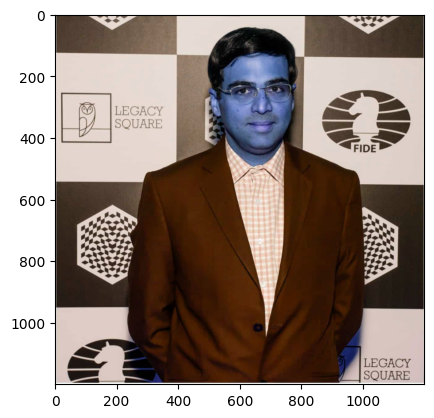

In [3]:
plt.imshow(img)

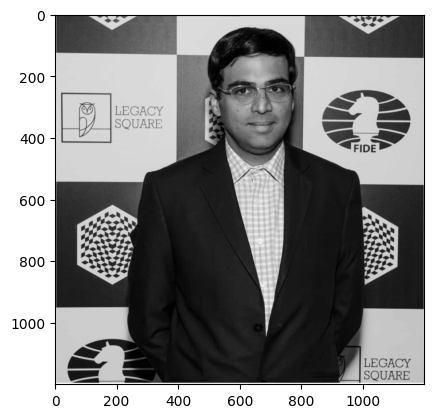

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [5]:
face_cascade = cv2.CascadeClassifier('opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('opencv/haarcascades/haarcascade_eye.xml')

In [6]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[516, 138, 290, 290]], dtype=int32)

In [7]:
(x, y, w, h) = faces[0]

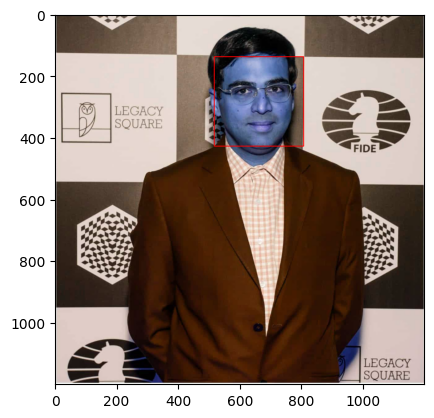

In [8]:
face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)

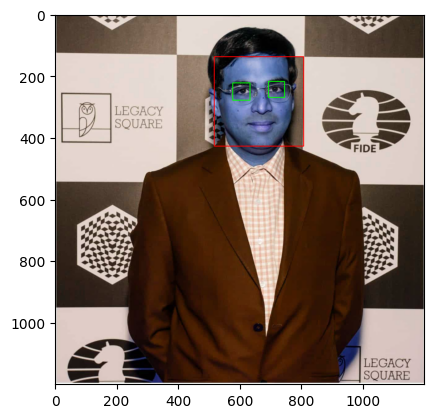

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img)
plt.show()

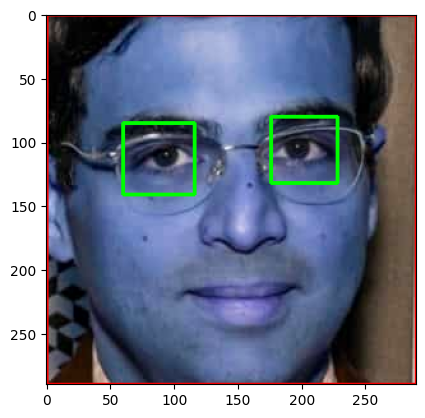

In [10]:
plt.imshow(roi_color, cmap='gray')

In [11]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

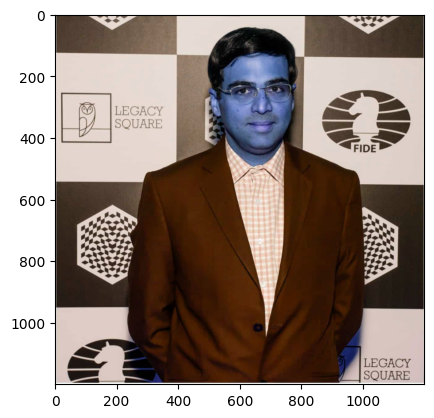

In [12]:
original_image = cv2.imread('test_images/test_img_1.jpg')
plt.imshow(original_image)

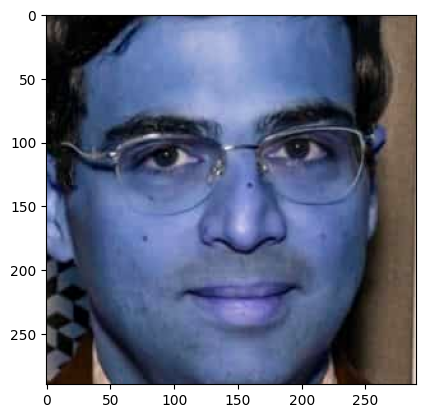

In [13]:
cropped_image = get_cropped_image_if_2_eyes('test_images/test_img_1.jpg')
plt.imshow(cropped_image)

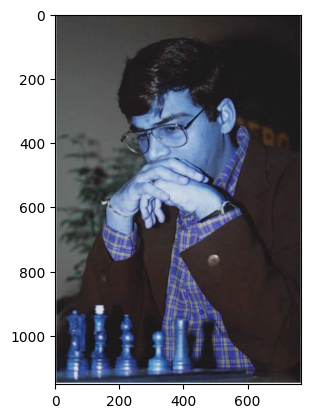

In [14]:
org_image = cv2.imread('test_images/test_img_2.jpg')
plt.imshow(org_image)

In [15]:
cropped_image_2 = get_cropped_image_if_2_eyes('test_images/test_img_2.jpg')
cropped_image_2

In [16]:
path_to_data = './dataset/'
path_to_cr_data = './dataset/cropped/'

In [17]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [18]:
img_dirs

['./dataset/lionel_messi',
 './dataset/mahendra_singh_dhoni',
 './dataset/muhammad_ali',
 './dataset/serena_williams',
 './dataset/sunil_chhetri',
 './dataset/viswanathan_anand']

In [19]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [20]:
cropped_img_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    try:
        count = 1
        celebrity_name = img_dir.split('/')[-1]
        celebrity_file_names_dict[celebrity_name] = []

        for entry in os.scandir(img_dir):
            try:
                roi_color = get_cropped_image_if_2_eyes(entry.path)
                
                if roi_color is not None:
                    cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
                    
                    if not os.path.exists(cropped_folder):
                        os.makedirs(cropped_folder)
                        cropped_img_dirs.append(cropped_folder)

                    cropped_file_name = f"{celebrity_name}{count}.png"
                    cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
                    
                    cv2.imwrite(cropped_file_path, roi_color)
                    celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                    count += 1

            except Exception as e:
                print(f"Error processing {entry.path}: {e}")

    except Exception as e:
        print(f"Error accessing directory {img_dir}: {e}")


Error processing ./dataset/mahendra_singh_dhoni/1680480189_file7pk5cje68n4jzj7zovw.gif: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Error processing ./dataset/mahendra_singh_dhoni/1685136092_screenshot-1.gif: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Error processing ./dataset/mahendra_singh_dhoni/703860-dhoni.gif: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'



libpng warning: iCCP: known incorrect sRGB profile


Error processing ./dataset/sunil_chhetri/1685237622_chhetri.gif: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Error processing ./dataset/viswanathan_anand/6d3cb3c1-8f2e-4960-9c6d-43ebc768c184.gif: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

